In [1]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
!ls /mydrive

#Navigate to /mydrive/mediapipe-main
%cd /mydrive/mediapipe-main

!pip install mediapipe
!pip install kaleido
!pip install PyQt5
!pip install IPython

/
Mounted at /content/gdrive
'2022-04-06 21-23.pdf'		    mediapipe-main
 ColabNB			   'My Drive'
'Colab Notebooks'		    Other
'Copy of Tumor_CNN_denoise.ipynb'   Tumor2
 Data-Viz			   'Untitled document.gdoc'
 DistCompSys			    videoplayback.mp4
 GSVPanoDepth.js-master		    videos
 Howells_bslevels.gsheet	    yolov4
 images
/content/gdrive/My Drive/mediapipe-main
     |████████████████████████████████| 32.7 MB 1.2 MB/s 
     |████████████████████████████████| 79.9 MB 109 kB/s 
     |████████████████████████████████| 8.3 MB 5.2 MB/s 
     |████████████████████████████████| 338 kB 49.7 MB/s 
     |████████████████████████████████| 59.9 MB 1.3 MB/s 


In [3]:
import cv2
import mediapipe as mp
import urllib.request
import numpy as np
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
import PyQt5
from PIL import Image
from IPython.core.display import Video
import nb_helpers

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose
mp_face_mesh = mp.solutions.face_mesh

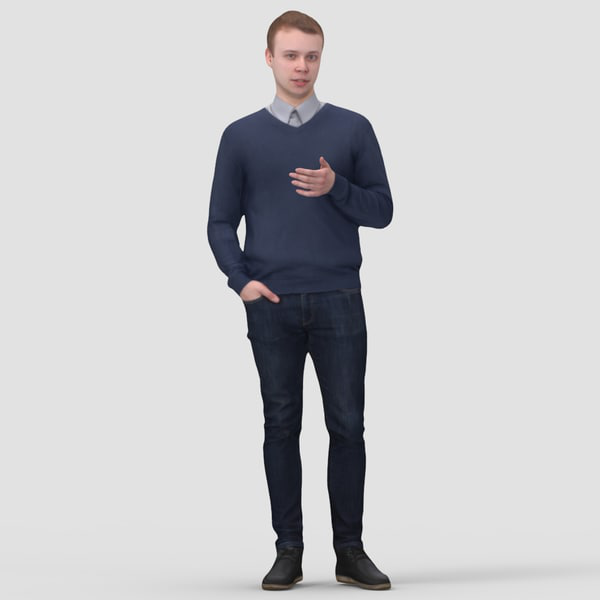

In [4]:
img_url = "https://static.turbosquid.com/Preview/2015/11/10__11_56_36/anthonystanding23dmetry3dhuman01.jpg5e774d4d-9b9e-456d-9d7b-fc4d741cf940Large.jpg"
urllib.request.urlretrieve(img_url, "pose.jpg")

img = Image.open('pose.jpg')
display(img)

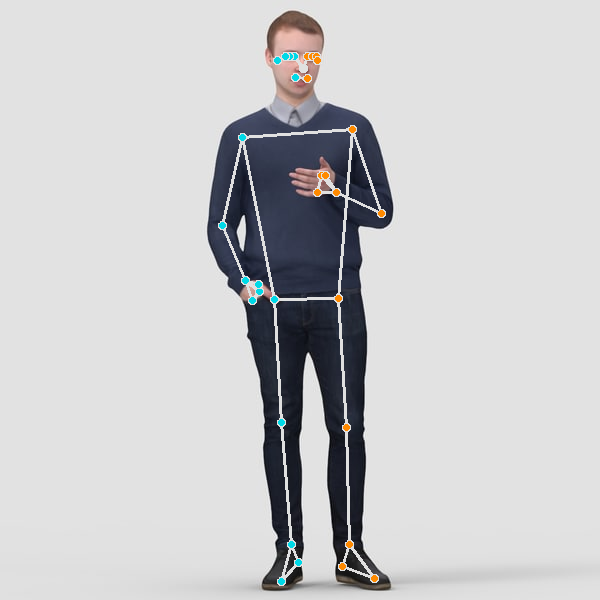

In [5]:
# Specify the image filename
file = 'pose.jpg'

# Create a MediaPipe `Pose` object
with mp_pose.Pose(static_image_mode=True, 
		  model_complexity=2,
                  enable_segmentation=True) as pose:
        
    # Read the file in and get dims
    image = cv2.imread(file)

    # Convert the BGR image to RGB and then process with the `Pose` object.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Copy the iamge
annotated_image = image.copy()

# Draw pose, left and right hands, and face landmarks on the image with drawing specification defaults.
mp_drawing.draw_landmarks(annotated_image, 
                          results.pose_landmarks, 
                          mp_pose.POSE_CONNECTIONS,
                          landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

# Save image with drawing
filename = "pose_wireframe.png"
cv2.imwrite(filename, annotated_image)

# Open image
display(Image.open(filename))

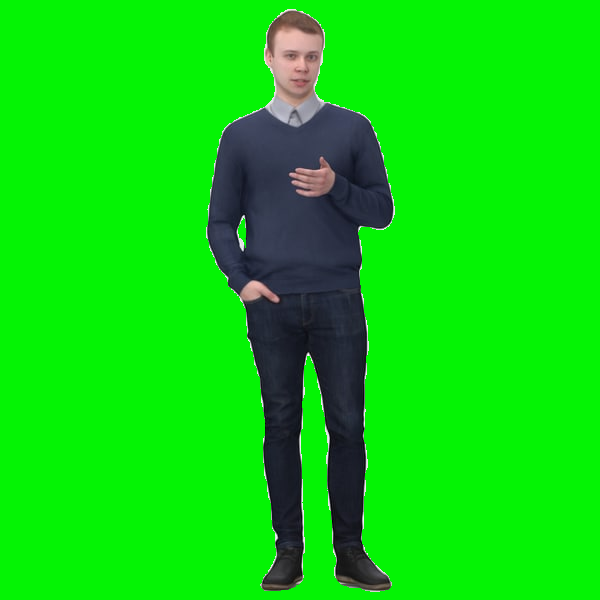

In [6]:
# Copy the image
segmented_image = image.copy()

# Probability threshold in [0, 1] that says how "tight" to make the segmentation. Greater value => tighter.
tightness = .3

# Stack the segmentation mask for 3 RGB channels, and then create a filter for which pixels to keep
condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > tightness

# Creates a black background image
bg_image = np.zeros(image.shape, dtype=np.uint8)

# Can change the color of this background by specifying (0-255) RGB values. We choose green-screen green.
bg_image[:] = [4, 244, 4]

# For every pixel location, display the corresponding pixel from the original imgae if the condition in our filter is met (i.e. the probability of being part of the object is above the inclusiogn threshold), or else display corresponding pixel from the background array (i.e. green)
segmented_image = np.where(condition, segmented_image, bg_image)

filename = "pose_green_screen.png"
cv2.imwrite(filename, segmented_image)
display(Image.open(filename))

In [7]:
poselandmarks_list = nb_helpers.poselandmarks_list

num = 0
for i in mp_holistic.POSE_CONNECTIONS:
    if num < 5:
        print(poselandmarks_list[i[0]], '-->', poselandmarks_list[i[1]])
    else:
        break
    num += 1

RIGHT_HEEL --> RIGHT_FOOT_INDEX
RIGHT_EYE --> RIGHT_EYE_OUTER
RIGHT_HIP --> RIGHT_KNEE
RIGHT_KNEE --> RIGHT_ANKLE
LEFT_SHOULDER --> LEFT_HIP


In [8]:
# Create a 3x33 array to store XYZ data for 33 landmarks
data = np.empty((3, len(mp_holistic.PoseLandmark)))

# Store the XYZ data for each landmark
landmarks = results.pose_world_landmarks.landmark
for i in range(len(mp_holistic.PoseLandmark)):
    data[:, i] = (landmarks[i].x, landmarks[i].y, landmarks[i].z)   

# Plot the data
fig = plt.figure()
fig.set_size_inches(5, 5, True)
ax = fig.add_subplot(projection='3d')

nb_helpers.plot_data(data, ax)
nb_helpers.scale_axes(ax)

# Save a rotation animation of the data
filename = 'pose_rotation.mp4'
nb_helpers.rotate_and_save(fig, ax, filename, save=True)

# Working with Video Data in MediaPipe


IndexError: ignored

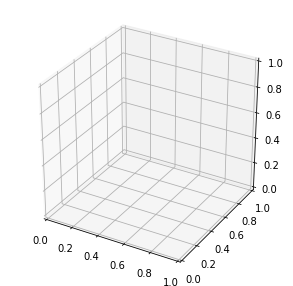

In [16]:
# Create a 3x33 array to store XYZ data for 33 landmarks
data = np.empty((3, len(mp_holistic.PoseLandmark)))

# Store the XYZ data for each landmark
landmarks = results.pose_world_landmarks.landmark
for i in range(len(mp_holistic.PoseLandmark)):
    data[:, i] = (landmarks[i].x, landmarks[i].y, landmarks[i].z)   

# Plot the data
fig = plt.figure()
fig.set_size_inches(5, 5, True)
ax = fig.add_subplot(projection='3d')

nb_helpers.plot_data(data, ax)
nb_helpers.scale_axes(ax)

# Save a rotation animation of the data
filename = 'pose_rotation.mp4'
nb_helpers.rotate_and_save(fig, ax, filename, save=True)
fig = plt.figure()
fig.set_size_inches(5, 5, True)
ax = fig.add_subplot(projection='3d')

anim = nb_helpers.time_animate(data, fig, ax)

# Save
anim.save('walking_wireframe.mp4', fps=30, extra_args=['-vcodec', 'libx264'], dpi=300)

IndexError: ignored

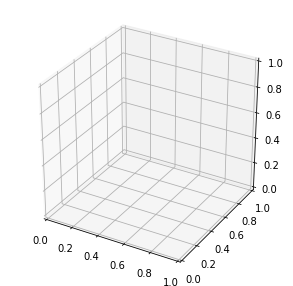

In [15]:
fig = plt.figure()
fig.set_size_inches(5, 5, True)
ax = fig.add_subplot(projection='3d')

anim = nb_helpers.time_animate(data, fig, ax)

# Save
anim.save('walking_wireframe.mp4', fps=30, extra_args=['-vcodec', 'libx264'], dpi=300)

In [12]:
import sys
sys.path.append('/content/gdrive/MyDrive/mediapipe-main/nb_helpers.py')
import nb_helpers
